In [1]:
import numpy as np
import pandas as pd
import pickle

# Load in the data:
with open('Data/cleaned_dataframe_subset.pkl', 'rb') as f:
    df = pickle.load(f)

df.head(7)

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,duplicated_source,radial_velocity,radial_velocity_error,teff_val,lum_val,subset,r_est,r_lo,r_hi
0,575388179144704,46.586249,0.451140,1.489403,0.566506,0.245852,0.652412,6.959413,0.939823,-2.869646,0.892436,False,NaN,NaN,NaN,NaN,1.0,1116.827227,748.928101,1713.798538
1,575456898624000,46.629160,0.585416,1.500458,0.636628,3.538279,0.767726,11.109998,1.269826,-15.447752,1.211021,False,NaN,NaN,NaN,NaN,1.0,296.639704,232.068021,408.570033
2,575559977808000,46.619333,0.111619,1.517034,0.108919,1.543781,0.138637,-7.319485,0.202482,-13.131690,0.207530,False,NaN,NaN,4092.17725,0.085104,1.0,636.392779,583.107495,700.057416
3,575559977809920,46.624884,0.293061,1.521894,0.335015,0.667886,0.426745,11.569505,0.653785,2.405117,0.614614,False,NaN,NaN,NaN,NaN,1.0,1076.209874,768.773445,1590.773702
6,575628697283456,46.684003,0.507014,1.514996,0.562390,0.671345,0.669175,3.062812,1.096600,-5.161016,1.044574,False,NaN,NaN,NaN,NaN,1.0,952.605502,629.470827,1517.572847
7,575663057019136,46.660431,0.428231,1.505106,0.506110,1.649634,0.633313,1.398725,0.957734,1.455517,0.965698,False,NaN,NaN,NaN,NaN,1.0,612.514394,425.308370,993.700453
8,575663057021312,46.663176,0.409746,1.512559,0.452759,0.793609,0.541798,3.835206,0.900692,-5.055062,0.868309,False,NaN,NaN,NaN,NaN,1.0,951.716897,656.389168,1467.806195


In [2]:
from sklearn.cluster import KMeans

X = df[['ra', 'dec', 'r_est', 'pmra', 'pmdec']]
print(X.shape)

(144806, 5)


In [3]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

labels = kmeans.predict(X)
centers = kmeans.cluster_centers_
print(labels[0:20])
print(centers)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0]
[[  45.84710659   16.30048311 1862.56493344    2.8867366    -3.50612891]
 [  45.60336553   13.73308782  765.27456966    6.24248135   -7.48683748]]


In [4]:
df.loc[:, 'labels'] = labels.copy()

In [5]:
df.head(10)

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,...,duplicated_source,radial_velocity,radial_velocity_error,teff_val,lum_val,subset,r_est,r_lo,r_hi,labels
0,575388179144704,46.586249,0.451140,1.489403,0.566506,0.245852,0.652412,6.959413,0.939823,-2.869646,...,False,NaN,NaN,NaN,NaN,1.0,1116.827227,748.928101,1713.798538,1
1,575456898624000,46.629160,0.585416,1.500458,0.636628,3.538279,0.767726,11.109998,1.269826,-15.447752,...,False,NaN,NaN,NaN,NaN,1.0,296.639704,232.068021,408.570033,1
2,575559977808000,46.619333,0.111619,1.517034,0.108919,1.543781,0.138637,-7.319485,0.202482,-13.131690,...,False,NaN,NaN,4092.17725,0.085104,1.0,636.392779,583.107495,700.057416,1
3,575559977809920,46.624884,0.293061,1.521894,0.335015,0.667886,0.426745,11.569505,0.653785,2.405117,...,False,NaN,NaN,NaN,NaN,1.0,1076.209874,768.773445,1590.773702,1
6,575628697283456,46.684003,0.507014,1.514996,0.562390,0.671345,0.669175,3.062812,1.096600,-5.161016,...,False,NaN,NaN,NaN,NaN,1.0,952.605502,629.470827,1517.572847,1
7,575663057019136,46.660431,0.428231,1.505106,0.506110,1.649634,0.633313,1.398725,0.957734,1.455517,...,False,NaN,NaN,NaN,NaN,1.0,612.514394,425.308370,993.700453,1
8,575663057021312,46.663176,0.409746,1.512559,0.452759,0.793609,0.541798,3.835206,0.900692,-5.055062,...,False,NaN,NaN,NaN,NaN,1.0,951.716897,656.389168,1467.806195,1
9,575697416760832,46.667729,0.370422,1.516735,0.374226,1.051860,0.445161,11.847218,0.826480,-5.844509,...,False,NaN,NaN,NaN,NaN,1.0,854.429413,618.123184,1274.059233,1
10,575697416763776,46.662205,0.118184,1.522609,0.123541,0.262377,0.150933,1.268180,0.248033,0.384804,...,False,NaN,NaN,NaN,NaN,1.0,2063.871411,1655.938736,2634.184563,0
11,575697416796288,46.671067,0.360059,1.522019,0.380800,0.438873,0.457596,2.213634,0.784292,-0.130535,...,False,NaN,NaN,NaN,NaN,1.0,1186.178810,835.373893,1754.354613,1


In [6]:
df.describe()

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,radial_velocity,radial_velocity_error,teff_val,lum_val,subset,r_est,r_lo,r_hi,labels
count,1.448060e+05,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000,2884.000000,2884.000000,38264.000000,27605.000000,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000
mean,5.806292e+16,45.667128,0.364385,14.404714,0.311368,1.266455,0.429614,5.364624,0.776553,-6.445491,0.693967,2.624768,2.116272,4937.922456,3.374990,1.502293,1052.323837,821.602990,1432.487008,0.738623
std,5.448575e+16,2.705760,0.364798,10.360857,0.301396,1.398750,0.425948,14.789071,0.783741,12.691960,0.744909,36.033567,2.545359,608.842748,25.048640,0.499996,610.957379,520.527775,765.761830,0.439387
min,5.753882e+14,39.397370,0.016614,1.215032,0.013412,0.000027,0.019115,-220.151361,0.032469,-924.894224,0.029633,-214.838053,0.110120,3243.000000,0.029058,1.000000,8.607152,8.600576,8.613737,0.000000
25%,3.330647e+15,43.320436,0.094899,4.130097,0.080073,0.469400,0.111194,-0.240062,0.197310,-9.062746,0.168166,-18.595147,0.658322,4623.054203,0.227252,1.000000,630.238163,455.751966,872.145084,0.000000
50%,1.108307e+17,46.204723,0.237451,22.350257,0.204065,0.907139,0.280981,2.936788,0.494771,-4.112792,0.419626,3.976430,1.304933,4972.500000,0.566464,2.000000,929.940575,680.813133,1391.978277,1.000000
75%,1.122491e+17,47.919100,0.522795,24.612546,0.456171,1.631365,0.621832,8.022298,1.091172,-0.958761,0.926415,23.855239,2.495388,5325.000000,1.430993,2.000000,1342.008153,1063.006154,1845.257483,1.000000
max,1.496924e+17,65.555744,3.681530,27.274562,2.391855,116.153585,4.106983,1741.859304,5.136050,223.695497,4.661877,242.938548,19.906323,9632.666990,1796.698970,2.000000,7101.204768,6356.833734,8021.140696,1.000000


In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df_cluster1 = df.loc[df.labels==0]
df_cluster2 = df.loc[df.labels==1]
df = df.drop(['labels'], axis=1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster1['ra'], df_cluster1['dec'], df_cluster1['r_est'], c='blue', s=60, alpha=0.3)
ax.scatter(df_cluster2['ra'], df_cluster2['dec'], df_cluster2['r_est'], c='red', s=60, alpha=0.3)
plt.show()

<Figure size 1000x1000 with 1 Axes>

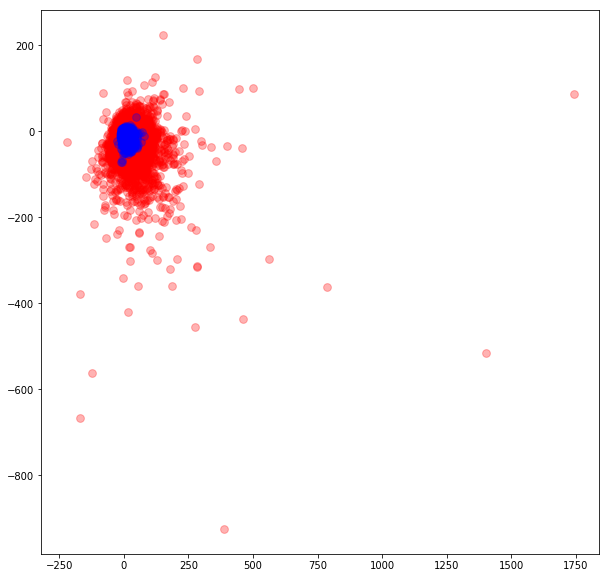

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_cluster1['pmra'], df_cluster1['pmdec'], c='blue', s=60, alpha=0.3,zorder=3)
ax.scatter(df_cluster2['pmra'], df_cluster2['pmdec'], c='red', s=60, alpha=0.3,zorder=2)
#ax.scatter(centers2[:,0], centers2[:,1], centers2[:,2], c='black', s=80, alpha=1.0, marker='D', zorder=1)
plt.show()

In [9]:
X.loc[:,'ra'] *= 60.0
X.loc[:,'dec'] *= 60.0
X.head(10)

,ra,dec,r_est,pmra,pmdec
0,2795.174925,89.364166,1116.827227,6.959413,-2.869646
1,2797.749576,90.027473,296.639704,11.109998,-15.447752
2,2797.160004,91.022040,636.392779,-7.319485,-13.131690
3,2797.493060,91.313632,1076.209874,11.569505,2.405117
6,2801.040203,90.899756,952.605502,3.062812,-5.161016
7,2799.625852,90.306388,612.514394,1.398725,1.455517
8,2799.790550,90.753546,951.716897,3.835206,-5.055062
9,2800.063739,91.004125,854.429413,11.847218,-5.844509
10,2799.732321,91.356554,2063.871411,1.268180,0.384804
11,2800.263996,91.321165,1186.178810,2.213634,-0.130535


In [10]:
def pm_to_v(pm, d):
    """
    Converts a proper motion column to a velocity column, requiring the distance
    in parsecs. Assumes the proper motions have units of milliarcseconds per year 
    (mas/yr).
    """
    pm_arcsec = pm * 1.0e-3     # Converting to arc seconds per year
    v = pm_arcsec * 4.74 * d    # Answer in kilometers per second
    
    return v

# Convert the proper motions to velocities:
X.loc[:, 'pmra'] = pm_to_v(df.pmra, df.r_est)
X.loc[:, 'pmdec'] = pm_to_v(df.pmdec, df.r_est)

In [11]:
X.describe()

,ra,dec,r_est,pmra,pmdec
count,144806.000000,144806.000000,144806.000000,144806.000000,144806.000000
mean,2740.027666,864.282840,1052.323837,19.873426,-24.176676
std,162.345598,621.651438,610.957379,36.505126,33.730821
min,2363.842205,72.901926,8.607152,-180.094581,-672.998768
25%,2599.226142,247.805818,630.238163,-1.173514,-37.211261
50%,2772.283401,1341.015440,929.940575,13.738820,-18.702958
75%,2875.145999,1476.752773,1342.008153,33.846675,-4.684253
max,3933.344644,1636.473705,7101.204768,774.429205,241.439190


In [12]:
kmeans2 = KMeans(n_clusters=2, random_state=42).fit(X)

labels2 = kmeans2.predict(X)
centers2 = kmeans2.cluster_centers_
print(labels2[0:20])
print(centers2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[2723.4290818   243.12339045  963.1150127    23.50928844  -25.71747806]
 [2756.46654607 1479.46574413 1140.67433088   16.27254591  -22.65069987]]


In [13]:
X.loc[:, 'labels'] = labels2.copy()

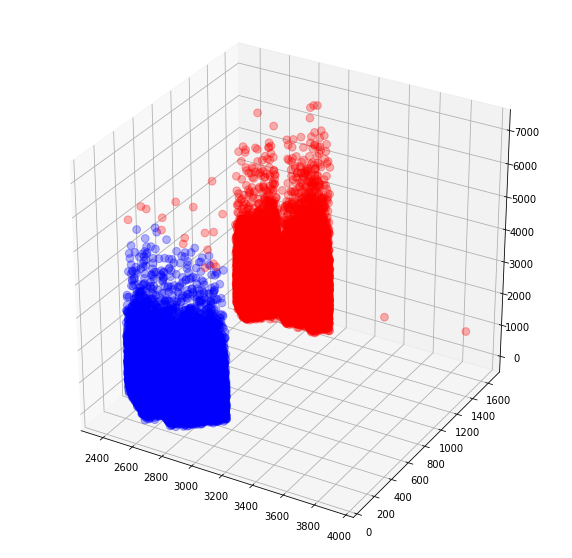

In [14]:
df_cluster1 = X.loc[X.labels==0]
df_cluster2 = X.loc[X.labels==1]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster1['ra'], df_cluster1['dec'], df_cluster1['r_est'], c='blue', s=60, alpha=0.3,zorder=3)
ax.scatter(df_cluster2['ra'], df_cluster2['dec'], df_cluster2['r_est'], c='red', s=60, alpha=0.3,zorder=2)
ax.scatter(centers2[:,0], centers2[:,1], centers2[:,2], c='black', s=80, alpha=1.0, marker='D', zorder=1)
plt.show()

In [15]:
X = X.drop(['labels'], axis=1)
X.head()

,ra,dec,r_est,pmra,pmdec
0,2795.174925,89.364166,1116.827227,36.841470,-15.191223
1,2797.749576,90.027473,296.639704,15.621460,-21.720655
2,2797.160004,91.022040,636.392779,-22.079240,-39.611767
3,2797.493060,91.313632,1076.209874,59.018763,12.269067
6,2801.040203,90.899756,952.605502,13.829670,-23.303793


In [16]:
kmeans4 = KMeans(n_clusters=4, random_state=42, max_iter=30000).fit(X)

labels4 = kmeans4.predict(X)
centers4 = kmeans4.cluster_centers_
print(labels4[0:20])
print(centers4)

[3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 1 3 3 1]
[[2751.73662271 1478.59052907  843.51685567   15.46032517  -21.39229155]
 [2725.7060677   243.33944732 1684.5139912    31.85395998  -34.42349308]
 [2770.02070466 1476.13826972 2017.26524087   18.8577142   -26.52754346]
 [2722.58927069  243.01289111  693.14118827   20.38617224  -22.4550925 ]]


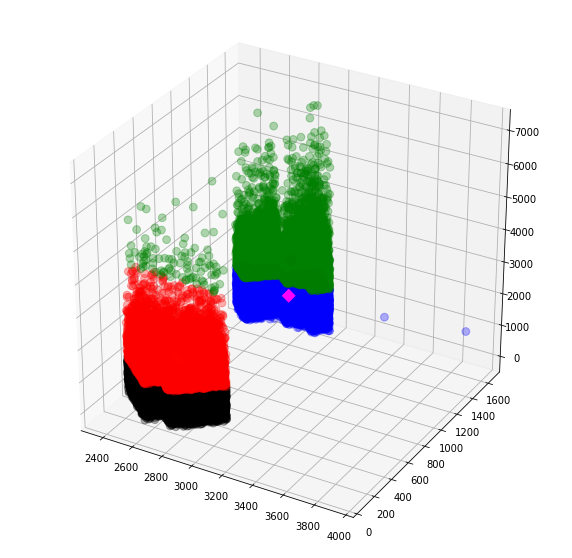

In [19]:
df.loc[:, 'labels'] = labels4.copy()
df_cluster1 = X.loc[df.labels==0]
df_cluster2 = X.loc[df.labels==1]
df_cluster3 = X.loc[df.labels==2]
df_cluster4 = X.loc[df.labels==3]
df = df.drop(['labels'], axis=1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cluster1['ra'], df_cluster1['dec'], df_cluster1['r_est'], c='blue', s=60, alpha=0.3)
ax.scatter(df_cluster2['ra'], df_cluster2['dec'], df_cluster2['r_est'], c='red', s=60, alpha=0.3)
ax.scatter(df_cluster3['ra'], df_cluster3['dec'], df_cluster3['r_est'], c='green', s=60, alpha=0.3)
ax.scatter(df_cluster4['ra'], df_cluster4['dec'], df_cluster4['r_est'], c='black', s=60, alpha=0.3)
ax.scatter(centers4[:,0], centers4[:,1], centers4[:,2], c='magenta', s=80, alpha=1.0, marker='D', zorder=1)
plt.show()

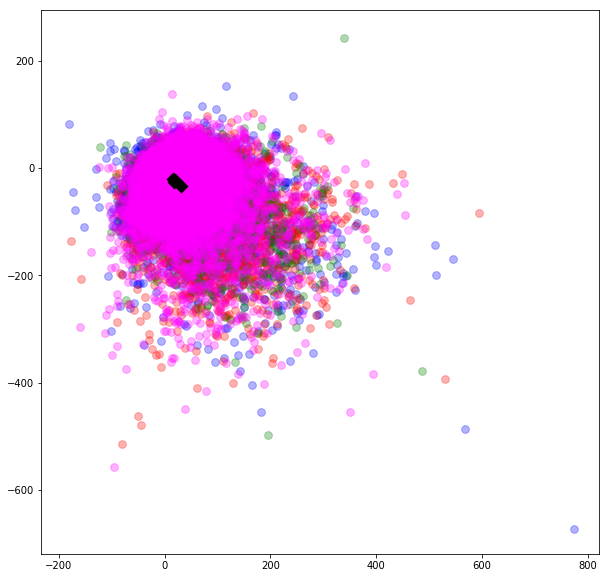

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_cluster1['pmra'], df_cluster1['pmdec'], c='blue', s=60, alpha=0.3)
ax.scatter(df_cluster2['pmra'], df_cluster2['pmdec'], c='red', s=60, alpha=0.3)
ax.scatter(df_cluster3['pmra'], df_cluster3['pmdec'], c='green', s=60, alpha=0.3)
ax.scatter(df_cluster4['pmra'], df_cluster4['pmdec'], c='magenta', s=60, alpha=0.3)
ax.scatter(centers4[:,3], centers4[:,4], c='black', s=80, alpha=1.0, marker='D', zorder=1)
plt.show()

In [21]:
X2 = X[['pmra', 'pmdec']]
kmeans_pm = KMeans(n_clusters=4, random_state=42).fit(X2)
labels_pm = kmeans_pm.predict(X2)
centers_pm= kmeans_pm.cluster_centers_
print(centers_pm)

[[  -2.45737663  -49.61376395]
 [ 130.86865567 -137.03679597]
 [  59.87907538  -28.82025688]
 [   9.40345878   -6.11486837]]


/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


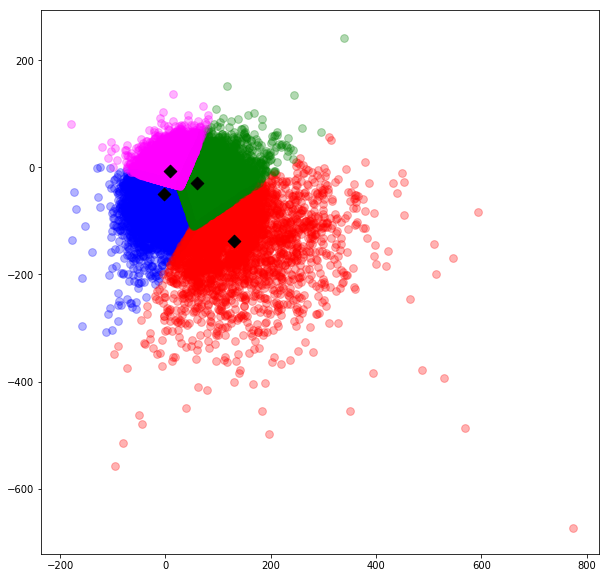

In [22]:
X2.loc[:, 'labels'] = labels_pm.copy()
df_cluster1 = X2.loc[X2.labels==0]
df_cluster2 = X2.loc[X2.labels==1]
df_cluster3 = X2.loc[X2.labels==2]
df_cluster4 = X2.loc[X2.labels==3]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_cluster1['pmra'], df_cluster1['pmdec'], c='blue', s=60, alpha=0.3)
ax.scatter(df_cluster2['pmra'], df_cluster2['pmdec'], c='red', s=60, alpha=0.3)
ax.scatter(df_cluster3['pmra'], df_cluster3['pmdec'], c='green', s=60, alpha=0.3)
ax.scatter(df_cluster4['pmra'], df_cluster4['pmdec'], c='magenta', s=60, alpha=0.3)
ax.scatter(centers_pm[:,0], centers_pm[:,1], c='black', s=80, alpha=1.0, marker='D', zorder=1)
plt.show()

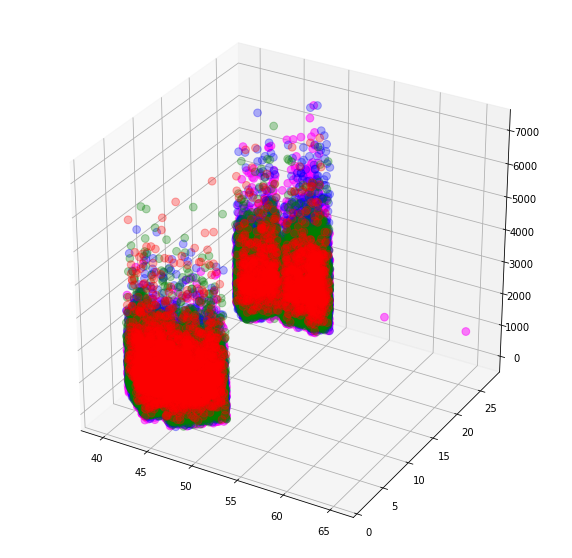

In [23]:
spatial1 = df.loc[X2.labels==0]
spatial2 = df.loc[X2.labels==1]
spatial3 = df.loc[X2.labels==2]
spatial4 = df.loc[X2.labels==3]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(spatial1['ra'], spatial1['dec'], spatial1['r_est'], c='blue', s=60, alpha=0.3)
ax.scatter(spatial2['ra'], spatial2['dec'], spatial2['r_est'], c='red', s=60, alpha=0.3)
ax.scatter(spatial3['ra'], spatial3['dec'], spatial3['r_est'], c='green', s=60, alpha=0.3)
ax.scatter(spatial4['ra'], spatial4['dec'], spatial4['r_est'], c='magenta', s=60, alpha=0.5)
#ax.scatter(centers4[:,0], centers4[:,1], centers4[:,2], c='magenta', s=80, alpha=1.0, marker='D', zorder=1)
plt.show()

In [24]:
# Try an elbow method:
scores = []
X_n = X[['pmra', 'pmdec']]
k_vals = range(2,30,2)
for k in k_vals:
    score_n = KMeans(n_clusters=k, random_state=42).fit(X_n).score(X_n)
    scores.append(score_n)

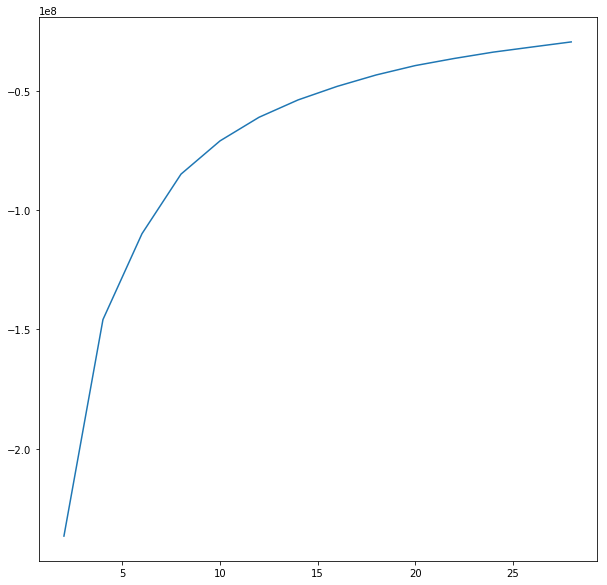

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(k_vals, scores)
plt.show()

In [26]:
from time import perf_counter as timer

# Based on the elbow, let's go with, say, 18?
X18 = X[['pmra', 'pmdec']]

begin_time = timer()
kmeans18 = KMeans(n_clusters=18, random_state=42).fit(X18)
labels_18 = kmeans18.predict(X18)
end_time = timer()
print('Time elapsed: {} seconds'.format((end_time-begin_time)))

Time elapsed: 46.23806641798001 seconds


/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


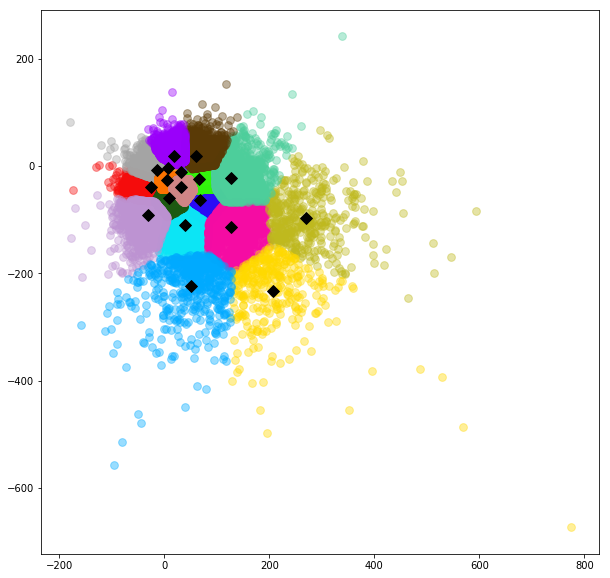

In [27]:
# Define 18 colors for the plotting:
colors = {'p':'#7741C8', 'r':'#F50C0C', 'm':'#F50CA3', 'b':'#2B0CF5', 'c':'#0CE5F5', 'l':'#33F50C', 't':'#4DCE9B',
          'g':'#1D5911', 'y':'#BFB91E', 'o':'#F2A52A', 'k':'#A4A4A4', 'w':'#5A3A06', 'v':'#BD93D2', 'd':'#FFD900',
          'n':'#FF7300', 'e':'#9A00FA', 'j':'#00AAFF', 's':'#D18787'}
colkeys = ['p', 'r', 'o', 'b', 'c', 'm', 'g', 'y', 'l', 'k', 't', 'w', 'v', 'd', 'n', 'e', 'j', 's']

X18.loc[:, 'labels'] = labels_18.copy()
centers18 = kmeans18.cluster_centers_

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for i in range(18):
    cluster = X18.loc[X18.labels==i]
    ax.scatter(cluster['pmra'], cluster['pmdec'], c=colors[colkeys[i]], s=60, alpha=0.4)
ax.scatter(centers18[:,0], centers18[:,1], c='black', s=70, alpha=1.0, marker='D', zorder=1)
plt.show()

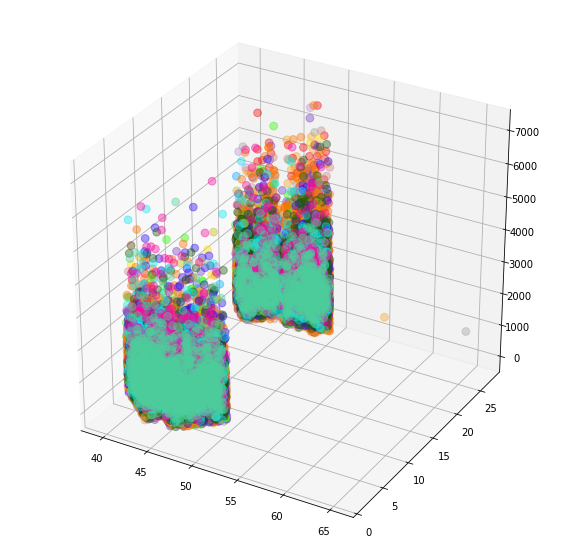

In [28]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(18):
    cluster = df.loc[X18.labels==i]
    ax.scatter(cluster['ra'], cluster['dec'], cluster['r_est'], c=colors[colkeys[i]], s=60, alpha=0.4)
plt.show()

In [29]:
# This time, we'll only fit with the spatial data:
X18_spatial = X[['ra', 'dec', 'r_est']]

begin_time = timer()
kmeans18_spatial = KMeans(n_clusters=18, random_state=42).fit(X18_spatial)
labels_18_spatial = kmeans18_spatial.predict(X18_spatial)
end_time = timer()
print('Time elapsed: {} seconds'.format((end_time-begin_time)))

Time elapsed: 24.954423158953432 seconds


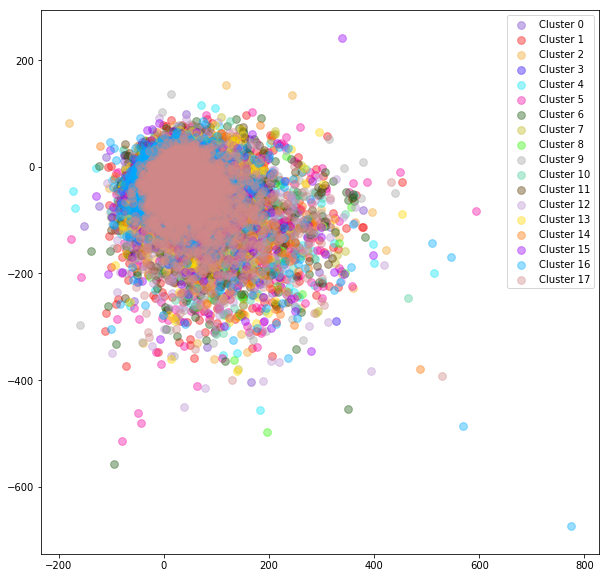

In [30]:
X.loc[:, 'labels'] = labels_18_spatial.copy()
#centers18_spatial = kmeans18_spatial.cluster_centers_

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for i in range(18):
    cluster = X.loc[X.labels==i]
    ax.scatter(cluster['pmra'], cluster['pmdec'], c=colors[colkeys[i]], s=60, alpha=0.4, 
               label='Cluster {}'.format(i))
#ax.scatter(centers18_spatial[:,3], centers18_spatial[:,4], c='black', s=70, alpha=1.0, marker='D', zorder=1)
plt.legend(loc='best')
plt.show()

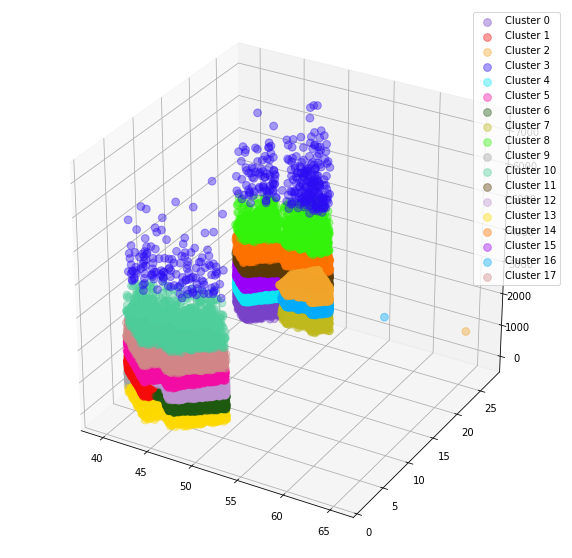

In [31]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(18):
    cluster = df.loc[X.labels==i]
    ax.scatter(cluster['ra'], cluster['dec'], cluster['r_est'], c=colors[colkeys[i]], s=60, alpha=0.4,
              label='Cluster {}'.format(i))
plt.legend(loc='best')
plt.show()

In [32]:
# This time, we'll try using all the data for fitting:
begin_time = timer()
kmeans18_total = KMeans(n_clusters=18, random_state=42).fit(X)
labels_18_total = kmeans18_total.predict(X)
end_time = timer()
print('Time elapsed: {} seconds'.format((end_time-begin_time)))

Time elapsed: 24.823956299980637 seconds


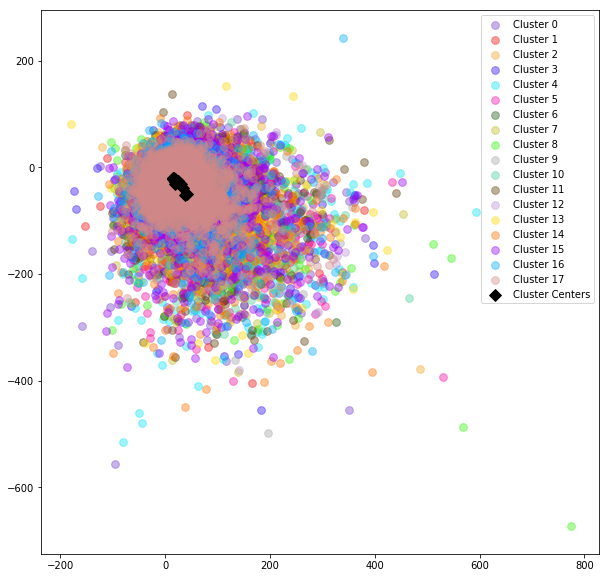

In [33]:
X.loc[:, 'labels'] = labels_18_total
centers18_total = kmeans18_total.cluster_centers_

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for i in range(18):
    cluster = X.loc[X.labels==i]
    ax.scatter(cluster['pmra'], cluster['pmdec'], c=colors[colkeys[i]], s=60, 
               alpha=0.4, label='Cluster {}'.format(i))
ax.scatter(centers18_total[:,3], centers18_total[:,4], c='black', s=70, alpha=1.0, 
           marker='D', zorder=1, label='Cluster Centers')
plt.legend(loc='best')
plt.show()

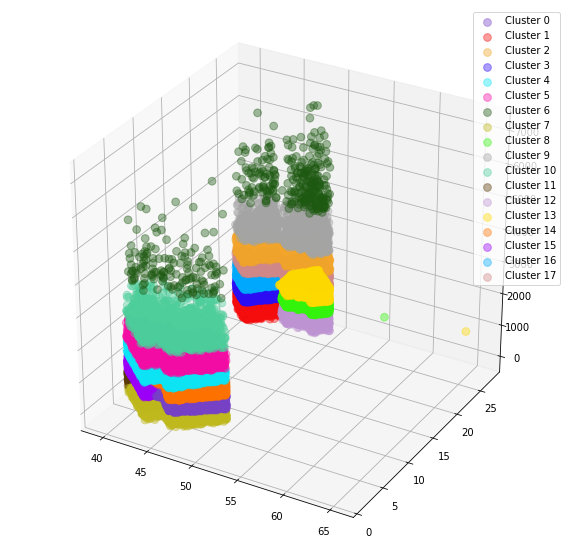

In [34]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(18):
    cluster = df.loc[X.labels==i]
    ax.scatter(cluster['ra'], cluster['dec'], cluster['r_est'], c=colors[colkeys[i]], s=60, alpha=0.4,
               label='Cluster {}'.format(i))
plt.legend(loc='best')
plt.show()

In [35]:
# New idea: Two-step clustering. First, we cluster by 2-D velocity space. Then, we separate each cluster
# into individual datasets, and cluster them based on the 3-D spacial data.

# First, the initial velocity clustering. I'll choose 18 again based on the previous elbow analysis.
X_pm = X[['pmra', 'pmdec']]

begin_time = timer()
kmeans_pm = KMeans(n_clusters=18, random_state=42).fit(X_pm)
labels_pm = kmeans18.predict(X_pm)
end_time = timer()
print('Time elapsed: {} seconds'.format((end_time-begin_time)))

Time elapsed: 43.988510586030316 seconds


In [36]:
# Next, we separate the 18 clusters into separate datasets:
X_pm.loc[:, 'label'] = labels_pm.copy()

dfs = {}
for i in range(18):
    cluster = X.loc[X_pm.loc[:, 'label']==i, :].copy()
    dfs[i] = cluster[['ra', 'dec', 'r_est']]
print(dfs.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])


/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/danielfeldman/anaconda/envs/gaia/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [46]:
# For each cluster, we pick the ideal k based on elbow method and split:
spatial_ks = []

# For each individual cluster (of the 18)
for i in range(18):
    # Calculate the scores for sub clusters of k between 1 and 16:
    scores = np.ones(16)
    for j in range(1, 17):
        scores[j-1] = KMeans(n_clusters=j, random_state=42).fit(dfs[i]).score(dfs[i])
    
    # Normalize the scores:
    scores = scores / (np.min(scores)*-1.0)
    
    # Calculate the slope (change in the scores) to find the best k val:
    slopes = np.ones(15)
    for ind in range(15):
        slopes[ind] = scores[ind+1] - scores[ind]
    try:
        ideal_k = np.where(slopes < 0.003)[0][0] + 1
    except IndexError:
        print('Warning: Slope for subset {} never reached < 0.003! Setting to 16.'.format(i))
        print(slopes)
        ideal_k = 16
    spatial_ks.append(ideal_k)
print(spatial_ks)

[0.53727376 0.18595047 0.07474632 0.05129848 0.02348859 0.02292127
 0.01274541 0.00963535 0.00785979 0.0060553  0.00492297 0.00438331
 0.00425696 0.0040282  0.0030531 ]
[0.38061432 0.28143375 0.09281931 0.06533064 0.04023039 0.02405151
 0.01732047 0.01151677 0.00904439 0.00554529 0.00564698 0.00432658
 0.00374984 0.00410534 0.00313885]
[0.46764367 0.2192303  0.09690356 0.04907397 0.03141386 0.02466611
 0.01418177 0.01294829 0.00697827 0.00698801 0.00491427 0.00457654
 0.00410146 0.00313578 0.00320157]
[0.49058699 0.19314304 0.10608845 0.0422807  0.03455167 0.02116799
 0.01507619 0.01281772 0.00655181 0.00641206 0.00492763 0.00442889
 0.00414584 0.00313538 0.00341274]
[0.43651373 0.24004415 0.08350223 0.06309392 0.03338138 0.02210053
 0.02010809 0.01217539 0.00943111 0.00559499 0.0055262  0.00448872
 0.00389664 0.00392505 0.00317338]
[0.50751409 0.18353828 0.10495243 0.04800283 0.02838753 0.0207733
 0.0110927  0.00962924 0.00757753 0.00628598 0.00530208 0.00468786
 0.00427338 0.00385364

In [47]:
# Now we run KMeans on each subcluster, using the k values obtained:
Y = np.arange(len(df)*2).reshape(len(df), 2)
for subset_ind in range(18):
    # First column of Y is the initial cluster number (out of 18)
    subset_positions = np.where(X_pm.label==subset_ind)
    Y[subset_positions, 0] = subset_ind
    
    # Second column of Y is the secondary cluster membership (based on the ideal k)
    kmeans = KMeans(n_clusters=spatial_ks[subset_ind], random_state=42).fit(dfs[subset_ind])
    labels_subset = kmeans.predict(dfs[subset_ind])
    Y[subset_positions, 1] = labels_subset

In [48]:
# Make a copy of original dataframe and let's add the Y columns to it:
df2 = df.copy()
df2.loc[:, 'Y1'] = Y[:,0].copy()
df2.loc[:, 'Y2'] = Y[:,1].copy()

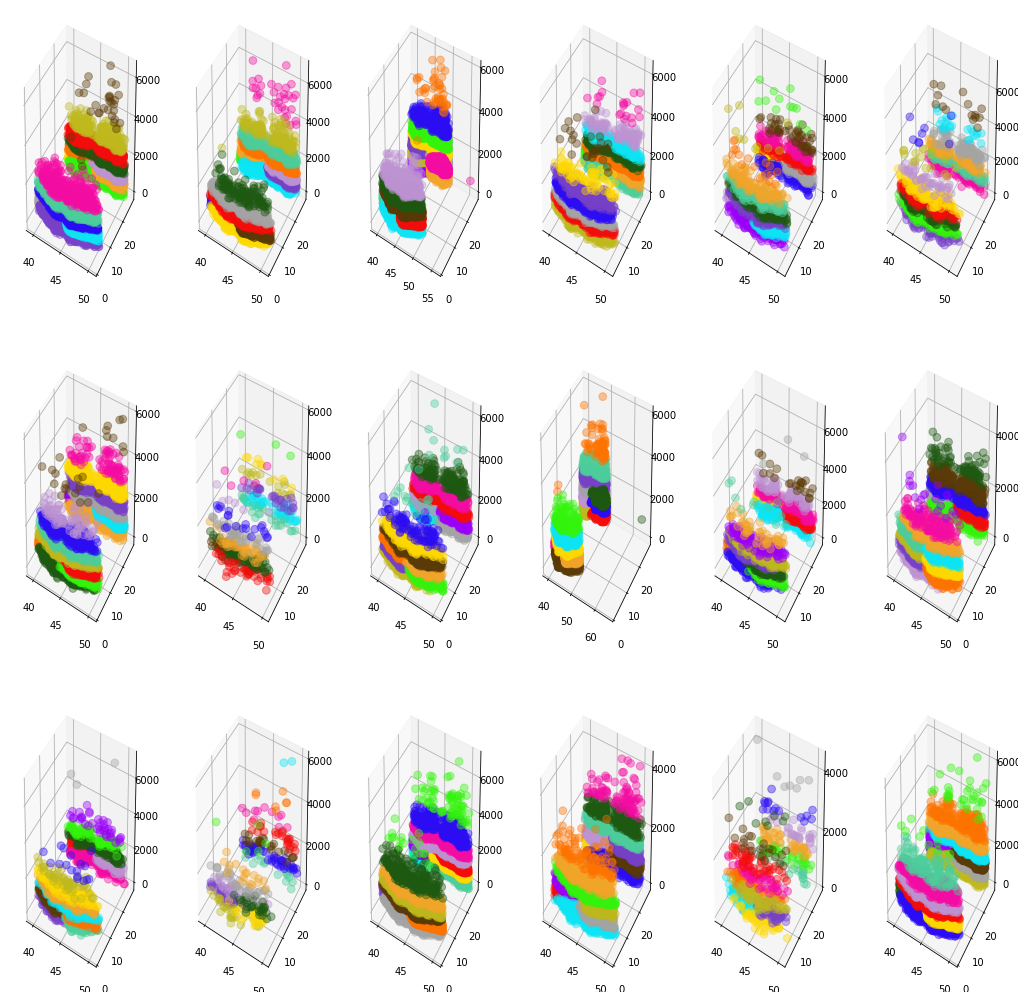

In [49]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18,18), subplot_kw={'projection': '3d'})
axs = axes.ravel()

for i in range(18):
    for j in range(spatial_ks[i]):
        axs[i].scatter(df2.loc[(df2.Y1==i) & (df2.Y2==j), 'ra'], df2.loc[(df2.Y1==i) & (df2.Y2==j), 'dec'], 
                       df2.loc[(df2.Y1==i) & (df2.Y2==j), 'r_est'], c=colors[colkeys[j]],
                       s=60, alpha=0.4, label='Cluster {}'.format(j))
    #axs[i].legend(loc='best')
plt.show()

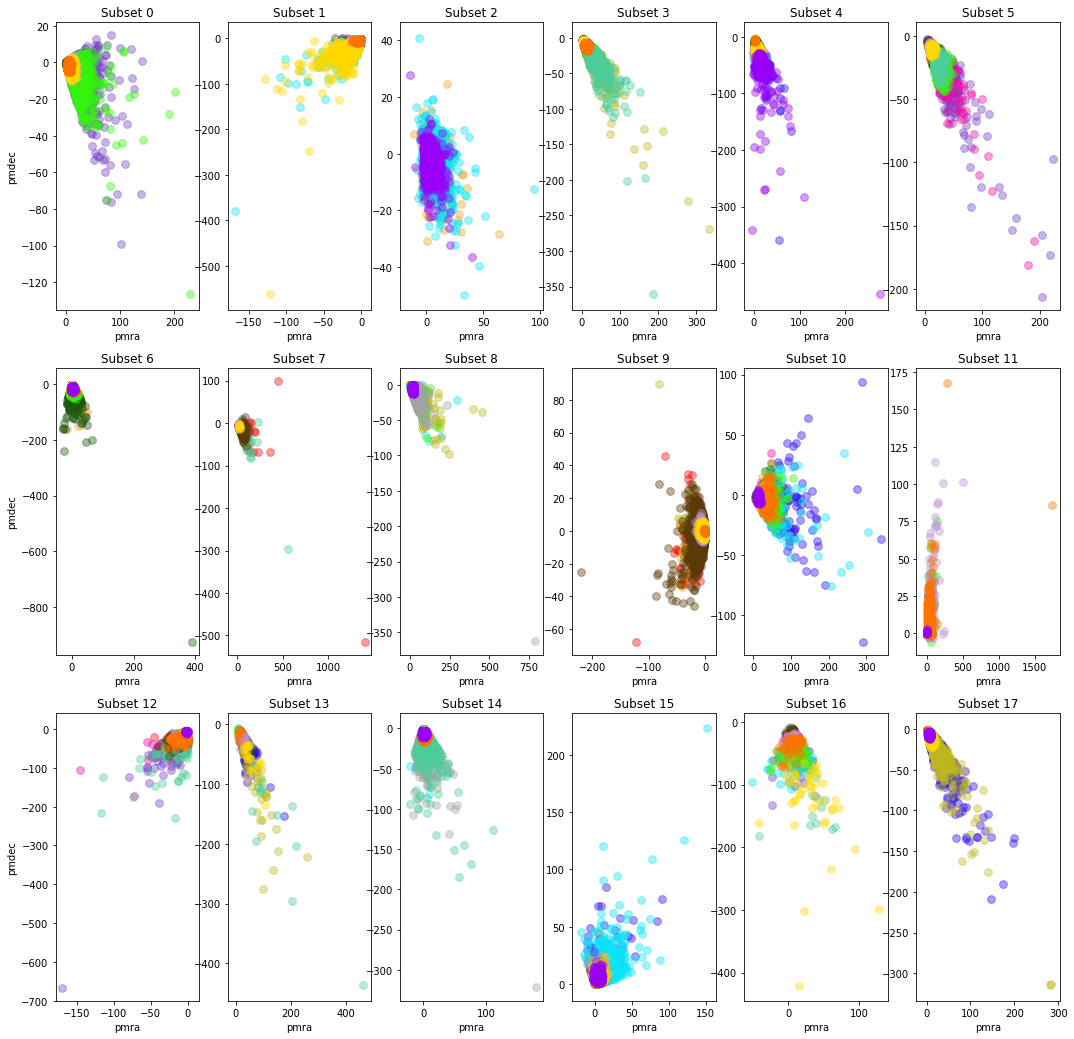

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18,18))
axs = axes.ravel()

for i in range(18):
    for j in range(spatial_ks[i]):
        axs[i].scatter(df2.loc[(df2.Y1==i) & (df2.Y2==j), 'pmra'], df2.loc[(df2.Y1==i) & (df2.Y2==j), 'pmdec'], 
                       c=colors[colkeys[j]],
                       s=60, alpha=0.4, label='Cluster {}'.format(j))
    #axs[i].legend(loc='best')
    if i%6 == 0:
        axs[i].set_ylabel('pmdec')
    axs[i].set_xlabel('pmra')
    axs[i].set_title('Subset {}'.format(i))
plt.show()